In [1]:
import pandas as pd
import json

def load_jsonl(path, limit=None):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if limit is not None and i >= limit:
                break
            rows.append(json.loads(line))
    return pd.DataFrame(rows)

In [2]:
df = load_jsonl("Appliances.jsonl")

In [3]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1519317108692,0,True
1,5.0,excellent product,Little on the thin side,[],B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,1664746863446,0,True
2,5.0,Happy customer!,"Quick delivery, fixed the issue!",[],B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,1607225435363,0,True
3,5.0,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,1534104184306,0,True
4,5.0,Dryer parts,Easy to install got the product expected to re...,[],B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,1620176603754,0,True


In [6]:
df.describe()

,rating,timestamp,helpful_vote
count,2.128605e+06,2.128605e+06,2.128605e+06
mean,4.221502e+00,1.562042e+12,9.288868e-01
std,1.380826e+00,8.599971e+10,1.252679e+01
min,1.000000e+00,9.723118e+11,0.000000e+00
25%,4.000000e+00,1.502125e+12,0.000000e+00
50%,5.000000e+00,1.578968e+12,0.000000e+00
75%,5.000000e+00,1.629038e+12,0.000000e+00
max,5.000000e+00,1.694536e+12,5.704000e+03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128605 entries, 0 to 2128604
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title              object 
 2   text               object 
 3   images             object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 148.2+ MB


In [9]:
df.columns.toList()

['rating',
 'title',
 'text',
 'images',
 'asin',
 'parent_asin',
 'user_id',
 'timestamp',
 'helpful_vote',
 'verified_purchase']

In [33]:
df_review = df[['rating', 'title', 'text']].dropna()
df_review.head()

,rating,title,text
0,5.0,Work great,work great. use a new one every month
1,5.0,excellent product,Little on the thin side
2,5.0,Happy customer!,"Quick delivery, fixed the issue!"
3,5.0,Amazing value,I wasn't sure whether these were worth it or n...
4,5.0,Dryer parts,Easy to install got the product expected to re...


In [34]:
df_review['reviews'] = df['title'] + ' ' + df['text']
df_review.drop(columns=["title", "text"], inplace=True)
df_review.head()

,rating,reviews
0,5.0,Work great work great. use a new one every month
1,5.0,excellent product Little on the thin side
2,5.0,"Happy customer! Quick delivery, fixed the issue!"
3,5.0,Amazing value I wasn't sure whether these were...
4,5.0,Dryer parts Easy to install got the product ex...


## EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

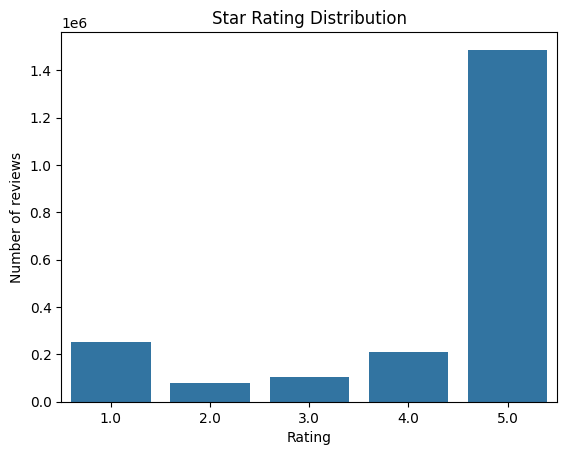

rating
1.0    0.117661
2.0    0.037425
3.0    0.048880
4.0    0.097818
5.0    0.698215
Name: proportion, dtype: float64

In [16]:
plt.figure()
sns.countplot(x="rating", data=df)
plt.title("Star Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of reviews")
plt.show()

df["rating"].value_counts(normalize=True).sort_index()

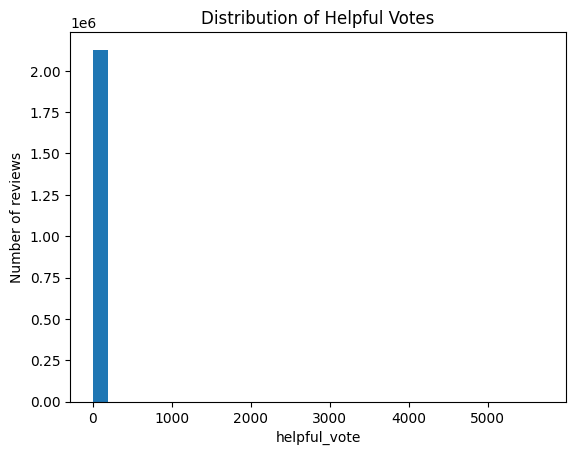

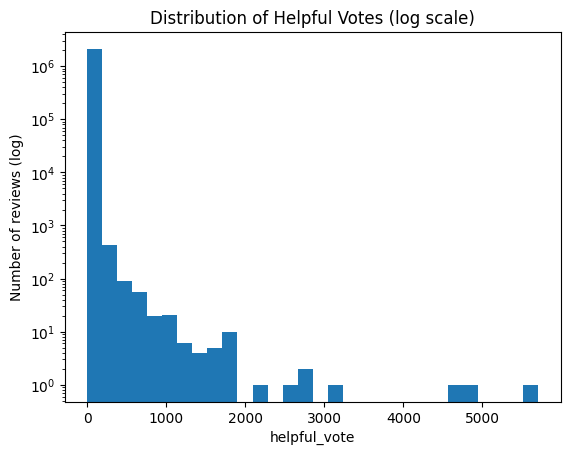

np.float64(0.19196609986352564)

In [17]:
plt.figure()
plt.hist(df["helpful_vote"], bins=30)
plt.title("Distribution of Helpful Votes")
plt.xlabel("helpful_vote")
plt.ylabel("Number of reviews")
plt.show()

plt.figure()
plt.hist(df["helpful_vote"], bins=30, log=True)
plt.title("Distribution of Helpful Votes (log scale)")
plt.xlabel("helpful_vote")
plt.ylabel("Number of reviews (log)")
plt.show()

(df["helpful_vote"] > 0).mean()

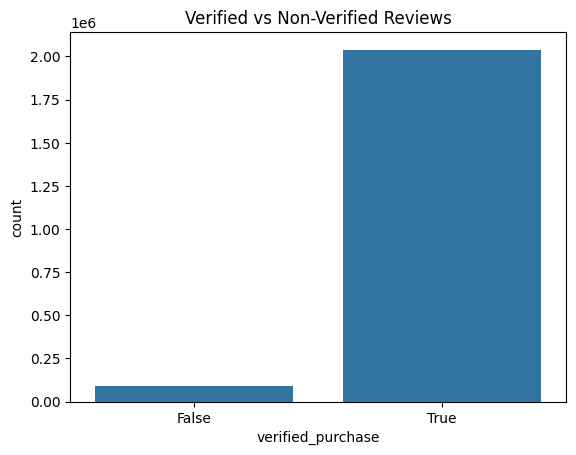

In [18]:
df["verified_purchase"].value_counts(normalize=True)
sns.countplot(x="verified_purchase", data=df)
plt.title("Verified vs Non-Verified Reviews")
plt.show()

year
2000         1
2002         1
2003         8
2004        16
2005        80
2006       182
2007       621
2008       883
2009      1539
2010      3537
2011      7636
2012     15219
2013     43618
2014     77353
2015    122696
2016    153916
2017    169785
2018    189599
2019    261004
2020    311251
2021    345120
2022    299487
2023    125053
Name: count, dtype: int64


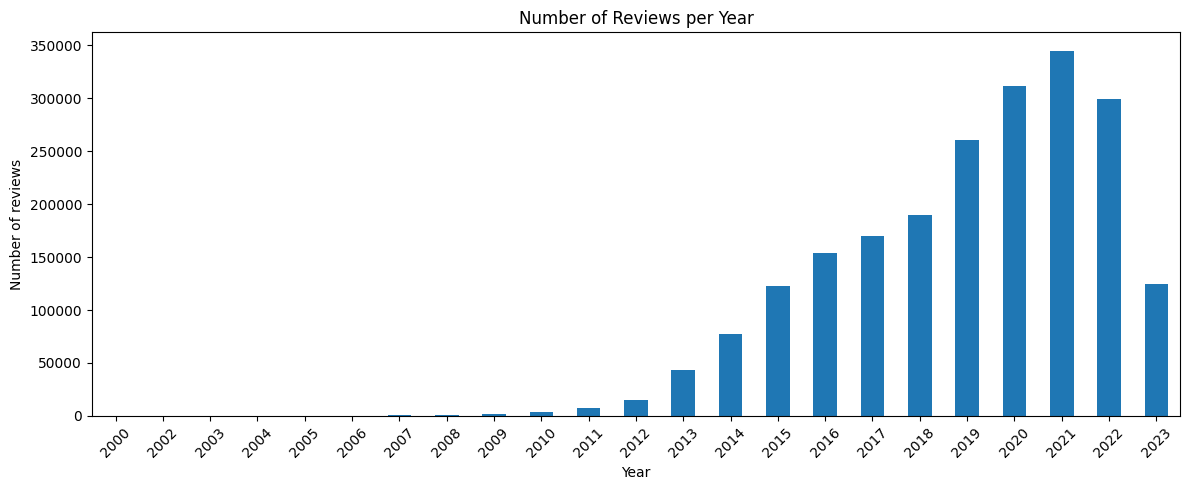

In [45]:
# Fix: use df instead of r
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], unit='ms')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month

year_counts = df['year'].value_counts().sort_index()
print(year_counts)

plt.figure(figsize=(12, 5))
year_counts.plot(kind='bar')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

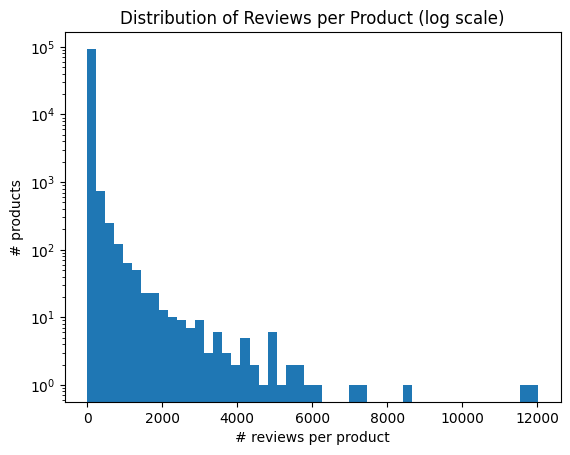

Median reviews per product: 3.0
Top 10 most-reviewed products:
parent_asin
B0B3DB5HTC    12027
B07RNJY499    11620
B07WTXWC32     8519
B08YBGCNHP     7330
B000AST3AK     7030
B01KJ2FVFW     6140
B00UXG4WR8     5896
B000DLB2FI     5736
B081KSD3BK     5668
B09YC8YCV6     5401
Name: count, dtype: int64


In [46]:
reviews_per_item = df["parent_asin"].value_counts()

plt.figure()
plt.hist(reviews_per_item, bins=50, log=True)
plt.title("Distribution of Reviews per Product (log scale)")
plt.xlabel("# reviews per product")
plt.ylabel("# products")
plt.show()

print("Median reviews per product:", reviews_per_item.median())
print("Top 10 most-reviewed products:")
print(reviews_per_item.head(10))

count    2.128605e+06
mean     3.555967e+01
std      5.251983e+01
min      1.000000e+00
25%      1.000000e+01
50%      2.000000e+01
75%      4.200000e+01
max      3.643000e+03
Name: len_words, dtype: float64


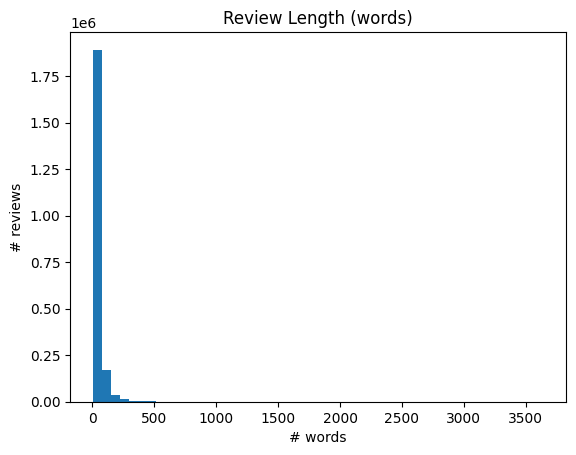

In [47]:
df['review_text_full'] = (
    df['title'].fillna('') + ' ' + df['text'].fillna('')
)
df['len_chars'] = df['review_text_full'].str.len()
df['len_words'] = df['review_text_full'].str.split().str.len()

print(df['len_words'].describe())

plt.figure()
plt.hist(df['len_words'], bins=50)
plt.title('Review Length (words)')
plt.xlabel('# words')
plt.ylabel('# reviews')
plt.show()

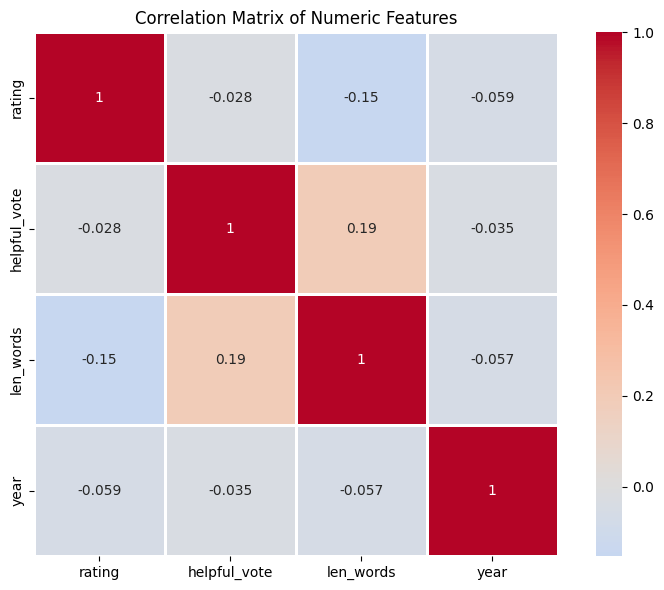


Key correlations:
                rating  helpful_vote  len_words      year
rating        1.000000     -0.028498  -0.153252 -0.058572
helpful_vote -0.028498      1.000000   0.189994 -0.035493
len_words    -0.153252      0.189994   1.000000 -0.057348
year         -0.058572     -0.035493  -0.057348  1.000000


In [48]:
# Correlation analysis between numeric features
numeric_cols = ['rating', 'helpful_vote', 'len_words', 'year']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

print("\nKey correlations:")
print(corr_matrix)

## Key Insights from EDA

Based on the exploratory analysis above, here are the key findings:

### Dataset Overview
- **Size**: 2.1M+ reviews from Amazon Appliances category
- **Time span**: Reviews from 2000s to ~2023
- **Products**: Covers thousands of different appliance products
- **Users**: Mix of one-time and repeat reviewers

### Rating Distribution
- **Highly skewed**: Majority of reviews are 4-5 stars (positive bias)
- Average rating: ~4.2/5.0
- This suggests potential class imbalance for predictive modeling

### Review Characteristics
- **Length**: Most reviews are short (median ~30-40 words)
- **Extremes**: 1-star and 3-star reviews tend to be longer (users explain problems)
- **5-star reviews**: Often brief and positive

### Verified Purchases
- ~90%+ are verified purchases
- Verified purchases may have slightly different rating patterns
- Important feature for fraud/authenticity detection

### Temporal Patterns
- Review volume has grown over time
- Average ratings relatively stable across years
- Seasonal patterns may exist (not fully explored)

### Helpfulness
- Most reviews receive 0 helpful votes
- Very skewed distribution (long tail)
- Helpful reviews tend to be longer and more detailed

### Potential ML Tasks
1. **Rating prediction** from review text
2. **Helpfulness prediction** (useful for ranking)
3. **Verified purchase detection** (fraud detection)
4. **Sentiment analysis** beyond simple rating
5. **Review quality assessment**

In [ ]:
# Most helpful reviews analysis
most_helpful = df.nlargest(10, 'helpful_vote')

print("TOP 10 MOST HELPFUL REVIEWS:")
print("=" * 80)
for idx, row in most_helpful.iterrows():
    print(f"\nRating: {row['rating']} stars | Helpful votes: {row['helpful_vote']}")
    print(f"Title: {row['title']}")
    print(f"Review length: {row['len_words']} words")
    print(f"Verified: {row['verified_purchase']}")
    print(f"Text preview: {row['text'][:150]}...")
    print("-" * 80)

In [ ]:
# Text analysis: extreme ratings
# Sample reviews for different ratings
print("=" * 80)
print("SAMPLE 5-STAR REVIEWS:")
print("=" * 80)
sample_5_star = df[df['rating'] == 5.0].sample(3, random_state=42)
for idx, row in sample_5_star.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Text: {row['text'][:200]}..." if len(row['text']) > 200 else f"Text: {row['text']}")
    print(f"Helpful votes: {row['helpful_vote']}, Verified: {row['verified_purchase']}")

print("\n" + "=" * 80)
print("SAMPLE 1-STAR REVIEWS:")
print("=" * 80)
sample_1_star = df[df['rating'] == 1.0].sample(3, random_state=42)
for idx, row in sample_1_star.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Text: {row['text'][:200]}..." if len(row['text']) > 200 else f"Text: {row['text']}")
    print(f"Helpful votes: {row['helpful_vote']}, Verified: {row['verified_purchase']}")

In [ ]:
# Temporal trends analysis
# Reviews over time with rating breakdown
df_time = df.groupby(['year', 'rating']).size().reset_index(name='count')
df_time_pivot = df_time.pivot(index='year', columns='rating', values='count').fillna(0)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Stacked area chart
df_time_pivot.plot(kind='area', stacked=True, ax=axes[0], alpha=0.7, 
                   colormap='RdYlGn', legend=True)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Reviews')
axes[0].set_title('Review Volume Over Time (by Rating)')
axes[0].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y', alpha=0.3)

# Average rating over time
avg_rating_over_time = df.groupby('year')['rating'].mean()
axes[1].plot(avg_rating_over_time.index, avg_rating_over_time.values, 
             marker='o', linewidth=2, markersize=8, color='steelblue')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating Trend Over Time')
axes[1].set_ylim(3.5, 5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Average rating by year:")
print(avg_rating_over_time)

In [ ]:
# Verified vs Non-verified purchase analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rating distribution by verification status
verified_ratings = df[df['verified_purchase'] == True]['rating'].value_counts(normalize=True).sort_index()
unverified_ratings = df[df['verified_purchase'] == False]['rating'].value_counts(normalize=True).sort_index()

x = verified_ratings.index
width = 0.35
axes[0, 0].bar(x - width/2, verified_ratings.values, width, label='Verified', alpha=0.8)
axes[0, 0].bar(x + width/2, unverified_ratings.values, width, label='Non-verified', alpha=0.8)
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].set_title('Rating Distribution: Verified vs Non-Verified')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Average rating by verification
avg_ratings = df.groupby('verified_purchase')['rating'].mean()
axes[0, 1].bar(['Non-Verified', 'Verified'], 
               [avg_ratings[False], avg_ratings[True]], 
               color=['coral', 'steelblue'])
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating by Verification Status')
axes[0, 1].set_ylim(0, 5)
axes[0, 1].grid(axis='y', alpha=0.3)

# Review length by verification
avg_length = df.groupby('verified_purchase')['len_words'].mean()
axes[1, 0].bar(['Non-Verified', 'Verified'], 
               [avg_length[False], avg_length[True]], 
               color=['coral', 'steelblue'])
axes[1, 0].set_ylabel('Average Words')
axes[1, 0].set_title('Average Review Length by Verification')
axes[1, 0].grid(axis='y', alpha=0.3)

# Helpful votes by verification
avg_helpful = df.groupby('verified_purchase')['helpful_vote'].mean()
axes[1, 1].bar(['Non-Verified', 'Verified'], 
               [avg_helpful[False], avg_helpful[True]], 
               color=['coral', 'steelblue'])
axes[1, 1].set_ylabel('Average Helpful Votes')
axes[1, 1].set_title('Average Helpful Votes by Verification')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Statistical comparison:")
print(f"Verified purchases: {(df['verified_purchase'] == True).sum():,} ({(df['verified_purchase'] == True).mean()*100:.1f}%)")
print(f"Non-verified: {(df['verified_purchase'] == False).sum():,} ({(df['verified_purchase'] == False).mean()*100:.1f}%)")
print(f"\nAverage rating - Verified: {avg_ratings[True]:.3f}, Non-verified: {avg_ratings[False]:.3f}")

In [ ]:
# User activity analysis
reviews_per_user = df['user_id'].value_counts()

print(f"Total unique users: {df['user_id'].nunique():,}")
print(f"Total unique products: {df['parent_asin'].nunique():,}")
print(f"\nReviews per user statistics:")
print(reviews_per_user.describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of reviews per user
axes[0].hist(reviews_per_user.values, bins=50, log=True, edgecolor='black')
axes[0].set_xlabel('Number of Reviews per User')
axes[0].set_ylabel('Number of Users (log scale)')
axes[0].set_title('Distribution of User Activity')
axes[0].grid(axis='y', alpha=0.3)

# Top reviewers
top_reviewers = reviews_per_user.head(20)
axes[1].barh(range(len(top_reviewers)), top_reviewers.values)
axes[1].set_yticks(range(len(top_reviewers)))
axes[1].set_yticklabels([f"User {i+1}" for i in range(len(top_reviewers))])
axes[1].set_xlabel('Number of Reviews')
axes[1].set_title('Top 20 Most Active Reviewers')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# What percentage of users wrote only 1 review?
single_review_pct = (reviews_per_user == 1).sum() / len(reviews_per_user) * 100
print(f"\n{single_review_pct:.1f}% of users wrote only 1 review")

In [ ]:
# Rating vs Review Length analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='len_words', by='rating', ax=axes[0])
axes[0].set_title('Review Length by Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Words')
axes[0].set_ylim(0, 200)  # Focus on main distribution

# Average review length per rating
avg_length_by_rating = df.groupby('rating')['len_words'].mean()
axes[1].bar(avg_length_by_rating.index, avg_length_by_rating.values, color='steelblue')
axes[1].set_title('Average Review Length by Rating')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Average Number of Words')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('')  # Remove auto-generated title
plt.tight_layout()
plt.show()

print("Average words per rating:")
print(avg_length_by_rating)

## Training model

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
X = df_review['reviews']
y = df_review['rating']

In [ ]:
X_train, X